<a href="https://colab.research.google.com/github/ryannemilligan/Traffic-Sign-Recognition-Deep-Learning/blob/main/Project_3_(Traffic_Sign_Recognition)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Sign Recognition

# The Scenario

"More than 38,000 people die every year in crashes on U.S. roadways. The U.S. traffic fatality rate is 12.4 deaths per 100,000 inhabitants. An additional 4.4 million are injured seriously enough to require medical attention." <br>

This brings with it the utmost importance to introduce autonomous vehicles to keep the people safe. <br>
However, to truly keep the people safe, the vehicles must be able to recognize the traffic signs and act accordingly. <br>

You are an AI Engineer with DriveSafe, a company that focuses on building autonomous vehicles.<br>
Your current task is to train the vehicles to recognize the traffic signs.<br>

Source: https://www.asirt.org/safe-travel/road-safety-facts/


# Tips for working on this project
You will be using these three concepts to be able to successfully complete this project:
1. Deep Learning models
2. AI Project Cycle <br>
3. AI Ethics <br>

If needed, please revise your notes on these topics.

# Section 1: Understand the Problem

One of the key points of solving an AI problem is to understand the problem statement correctly. <br>
You need to understand what is the correct problems that you are solving.<br>
You want to solve the root problem and not the symptoms.<br>
To do that, you can use tools like 5 Whys, decomposition, and Fish-bone diagram.<br>
You can then write your problem statement.<br>
It may include helpful information, like who is affected, what is the problem, where is it happening, and when does it happen.<br>

Based on the scenario above, write your problem statement in the cell below.<br>

In [1]:
# There are a lot of roadway crashes and fatalities in the United States which
# signifies a need for increased vehicle safety. Autonomous vehicles are
# therefore being developed, but the effectiveness of these vehicles in decreasing
# these accidents is only as good as their ability to accurately perceive and then
# react to their environment in real time. The problem is then to develop an AI
# that is capable of the accuracies of recognizing traffic signs, which will
# enable autonomous vehicles to make safe driving decisions to reduce accidents,
# injuries, and deaths.



# Section 2: Data Acquisition

Data is the main ingredient for AI model. <br>
For a typical scenario for autonomous vehicles, where can you find your data? <br>
Write your answer in the cell below. <br>

In this scenario, you are given a few files.<br>
These files are downloaded from: https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign <br>


In [2]:
# Your answers here!


## The AI Ethics of Handling Data
AI Ethics are a vital component in our daily life. <br>
What areas of AI Ethics are important in this scenario? <br>
What are the implications of ignoring AI Ethics? <br>
More importantly, what can you do to uphold AI Ethics in this scenario? <br>
Write your answer in the cell below.

In [3]:
# AI Ethics in Data Handling for Autonomous Vehicles: Privacy issues when
# accidentally capturing data on humans, Bias based on not capturing all traffic
# signs in weather conditions, lighting, etc.

# Implications of Ignoring AI Ethics: Legal issues like lawsuits, safety risks
# based on inaccurate models which would go against the whole point of AVs, loss
# of trust from the public in AVs, reputation issues with bad publicity.

# How to Uphold AI Ethics in this Scenario: Anonymize data to protect the privacy
# of humans, license plates, etc, make sure data is diverse ans covers different
# regions, lighting conditions, and angles to avoid bias, obtaining proper licensing,
# audits regularly, being transparent with the data sources, and lastly human
# oversight and QA.


# Import libraries and insert the file

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split

# Uncomment the below if your tensorflow is 2.x
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [5]:
print(tf.__version__)

2.18.0


# Section 3: Data Exploration
Let's prepare the data so that it's ready for the modeling.

In [6]:
# Let's initialize some variables
data = [] # initial empty list for data
labels = [] # initial empty list for labels
classes = 43 # 43 different traffic signs
current_path = os.getcwd() # current working directory

In [7]:
from google.colab import files
files.upload()
# import kaggle.json file to import directly from kaggle

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ryannemilligan","key":"5e329b2127e598a174846cb699baed36"}'}

In [8]:
import os # operating system
os.makedirs('/root/.kaggle', exist_ok=True) # make directory in root called kaggle
!mv kaggle.json /root/.kaggle/ # moves the kaggle.json file into the kaggle folder
!chmod 600 /root/.kaggle/kaggle.json # permissions


In [9]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
#importing large dataset directly from kaggle

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 99% 605M/612M [00:03<00:00, 162MB/s]
100% 612M/612M [00:03<00:00, 187MB/s]


In [10]:
!unzip -q gtsrb-german-traffic-sign.zip -d /content/train
# unzipping the file

In [11]:
# Retrieve the images and their labels
from PIL import Image # imports image class
import numpy as np
from tqdm import tqdm # progress bars in loops visuals

data = []
labels = []
classes = 43
current_path = '/content/train/Train'

# Check directory structure
print("Folders found in current_path:", os.listdir(current_path)) # folder structure is correct

for i in range(classes): # goes through each class folder
    class_folder = os.path.join(current_path, str(i)) # building the path
    if not os.path.exists(class_folder):
        print(f"Warning: Folder not found: {class_folder}")
        continue # skipping folder that don't exist

    images = os.listdir(class_folder) # getting image names
    print(f"Loading {len(images)} images from class {i}") # prints how many images were found

    for img_name in tqdm(images, desc=f'Loading class {i}'): # looping through each images
        try:
            img_path = os.path.join(class_folder, img_name) # full file path to the image
            image = Image.open(img_path).convert('RGB')     # convert to RGB
            image = image.resize((30, 30))                  # resize to 30x30
            image = np.array(image) / 255.0                 # normalize pixels
            data.append(image)                              # adding image to data list
            labels.append(i)                                # adds correct label
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")   # prints error without crashing if image doesn't load

data = np.array(data)                                       # converts to NumPy arrays
labels = np.array(labels)                                   # converts to NumPy arrays

print(f"Loaded {len(data)} images total.")
print(f"Data shape: {data.shape}")                          # Number of images, height, width, colors
print(f"Labels shape: {labels.shape}")

Folders found in current_path: ['9', '12', '24', '38', '30', '35', '6', '18', '36', '27', '14', '39', '2', '32', '11', '28', '7', '37', '34', '41', '3', '40', '8', '26', '10', '33', '29', '4', '20', '21', '0', '16', '31', '22', '5', '25', '1', '19', '13', '17', '23', '15', '42']
Loading 210 images from class 0


Loading class 0: 100%|██████████| 210/210 [00:00<00:00, 1212.56it/s]


Loading 2220 images from class 1


Loading class 1: 100%|██████████| 2220/2220 [00:00<00:00, 2314.07it/s]


Loading 2250 images from class 2


Loading class 2: 100%|██████████| 2250/2250 [00:00<00:00, 2642.31it/s]


Loading 1410 images from class 3


Loading class 3: 100%|██████████| 1410/1410 [00:00<00:00, 2823.39it/s]


Loading 1980 images from class 4


Loading class 4: 100%|██████████| 1980/1980 [00:00<00:00, 2527.14it/s]


Loading 1860 images from class 5


Loading class 5: 100%|██████████| 1860/1860 [00:00<00:00, 1980.56it/s]


Loading 420 images from class 6


Loading class 6: 100%|██████████| 420/420 [00:00<00:00, 2098.88it/s]


Loading 1440 images from class 7


Loading class 7: 100%|██████████| 1440/1440 [00:00<00:00, 1834.53it/s]


Loading 1410 images from class 8


Loading class 8: 100%|██████████| 1410/1410 [00:00<00:00, 1756.19it/s]


Loading 1470 images from class 9


Loading class 9: 100%|██████████| 1470/1470 [00:00<00:00, 2726.98it/s]


Loading 2010 images from class 10


Loading class 10: 100%|██████████| 2010/2010 [00:00<00:00, 2883.85it/s]


Loading 1320 images from class 11


Loading class 11: 100%|██████████| 1320/1320 [00:00<00:00, 2022.32it/s]


Loading 2100 images from class 12


Loading class 12: 100%|██████████| 2100/2100 [00:00<00:00, 2366.99it/s]


Loading 2160 images from class 13


Loading class 13: 100%|██████████| 2160/2160 [00:00<00:00, 2187.12it/s]


Loading 780 images from class 14


Loading class 14: 100%|██████████| 780/780 [00:00<00:00, 1770.86it/s]


Loading 630 images from class 15


Loading class 15: 100%|██████████| 630/630 [00:00<00:00, 2514.57it/s]


Loading 420 images from class 16


Loading class 16: 100%|██████████| 420/420 [00:00<00:00, 2357.86it/s]


Loading 1110 images from class 17


Loading class 17: 100%|██████████| 1110/1110 [00:00<00:00, 2916.23it/s]


Loading 1200 images from class 18


Loading class 18: 100%|██████████| 1200/1200 [00:00<00:00, 2061.11it/s]


Loading 210 images from class 19


Loading class 19: 100%|██████████| 210/210 [00:00<00:00, 2096.66it/s]


Loading 360 images from class 20


Loading class 20: 100%|██████████| 360/360 [00:00<00:00, 2843.46it/s]


Loading 330 images from class 21


Loading class 21: 100%|██████████| 330/330 [00:00<00:00, 2027.94it/s]


Loading 390 images from class 22


Loading class 22: 100%|██████████| 390/390 [00:00<00:00, 2566.41it/s]


Loading 510 images from class 23


Loading class 23: 100%|██████████| 510/510 [00:00<00:00, 1998.12it/s]


Loading 270 images from class 24


Loading class 24: 100%|██████████| 270/270 [00:00<00:00, 2126.61it/s]


Loading 1500 images from class 25


Loading class 25: 100%|██████████| 1500/1500 [00:00<00:00, 2070.66it/s]


Loading 600 images from class 26


Loading class 26: 100%|██████████| 600/600 [00:00<00:00, 2418.33it/s]


Loading 240 images from class 27


Loading class 27: 100%|██████████| 240/240 [00:00<00:00, 2422.51it/s]


Loading 540 images from class 28


Loading class 28: 100%|██████████| 540/540 [00:00<00:00, 2395.66it/s]


Loading 270 images from class 29


Loading class 29: 100%|██████████| 270/270 [00:00<00:00, 2276.49it/s]


Loading 450 images from class 30


Loading class 30: 100%|██████████| 450/450 [00:00<00:00, 2280.55it/s]


Loading 780 images from class 31


Loading class 31: 100%|██████████| 780/780 [00:00<00:00, 2489.98it/s]


Loading 240 images from class 32


Loading class 32: 100%|██████████| 240/240 [00:00<00:00, 3080.39it/s]


Loading 689 images from class 33


Loading class 33: 100%|██████████| 689/689 [00:00<00:00, 2500.65it/s]


Loading 420 images from class 34


Loading class 34: 100%|██████████| 420/420 [00:00<00:00, 1826.29it/s]


Loading 1200 images from class 35


Loading class 35: 100%|██████████| 1200/1200 [00:00<00:00, 2655.38it/s]


Loading 390 images from class 36


Loading class 36: 100%|██████████| 390/390 [00:00<00:00, 2059.70it/s]


Loading 210 images from class 37


Loading class 37: 100%|██████████| 210/210 [00:00<00:00, 2422.97it/s]


Loading 2070 images from class 38


Loading class 38: 100%|██████████| 2070/2070 [00:01<00:00, 1836.53it/s]


Loading 300 images from class 39


Loading class 39: 100%|██████████| 300/300 [00:00<00:00, 1461.26it/s]


Loading 360 images from class 40


Loading class 40: 100%|██████████| 360/360 [00:00<00:00, 1492.34it/s]


Loading 240 images from class 41


Loading class 41: 100%|██████████| 240/240 [00:00<00:00, 1754.32it/s]


Loading 240 images from class 42


Loading class 42: 100%|██████████| 240/240 [00:00<00:00, 1911.07it/s]


Loaded 39209 images total.
Data shape: (39209, 30, 30, 3)
Labels shape: (39209,)


I went back to step 3 data exploration.  In the cell where we were suppose to Retrieve the images and their labels, I changed some things around.  I first had to fix the path to where the class folders actually were.  I also converte all images to RGB for consistency.  I did this to make sure all images were loaded properly and consistantly to try and improve accuracy.

## Train Test Split
Do you still remember how to split your data into training data and testing data? <br>
For easy reference, you need to create: X_train, X_test, y_train, y_test <br>

What ratio will you use to do the split? <br>
Common ratios are 70:30 and 80:20.

In [12]:
# Convert lists into numpy arrays
from sklearn.model_selection import train_test_split                # need for splitting data from training and testing
from tensorflow.keras.utils import to_categorical

# data already normalized once
print(data.shape, labels.shape)                                     # printing the entire shape of the dataset

X_train, X_test, y_train, y_test = train_test_split(                # splitting your data and labels into training and testing sets
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)     # confirming the split worked correctly

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


My model will train on 31,367 images and be evaluated on 7,842 unseen images.

## One Hot Encoding

Usually, numbers in Machine Learning algorithms mean ranking or importance. <br>
However, some input data do not have any ranking. This may lead to poor predictions. <br>
Therefore, we need to use one hot encoding to solve the above problem. <br>
Do you still remember how to do that? <br>
Write your answer in the cell below.

In [13]:
# Your answers here!
# Convert the labels into one hot encoding
y_train_cat = to_categorical(y_train, num_classes=43)
y_test_cat = to_categorical(y_test, num_classes=43)

print(y_train_cat.shape, y_test_cat.shape)



(31367, 43) (7842, 43)


(39209, 43) confirms that my labels are correctly one-hot encoded

# Section 4: Modeling
We will be building our Neural Network. <br>
Do you still remember how it looks like? <br>

There are different layers, each with different purposes:
1. Conv2D : it is a 2D convolution layer to produce a tensor of outputs.
2. MaxPool2D : it reduces the size by sampling the maximum value in the region.
3. Dropout : it drops some neural network connections to prevent overfitting. <br>

In the cell below, create your own Neural Network model. <br>
You can experiment by mixing layers of Conv2D, MaxPool2D, and Dropout, of varying parameters.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(30,30,3)),
    MaxPool2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(256, (3,3), activation='relu'),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')
])


















/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compilation
You will need to determine what is the metrics for your model. <br>
You've learned about binary_crossentropy and categorical_crossentropy. <br>
You've also learned about the different optimizers (ADAM, SGD, etc).

In [15]:
# Your answers here!
# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,430,699 (5.46 MB)

 Trainable params: 1,430,699 (5.46 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
print(f"Data range: min={X_train.min()}, max={X_train.max()}")
print(f"Training labels shape: {y_train_cat.shape}")
print(f"Sample labels one-hot:\n{y_train_cat[:5]}")

# Confirm stratification
unique, counts = np.unique(y_train, return_counts=True)
print(f"Train label distribution: {dict(zip(unique, counts))}")


Data range: min=0.0, max=1.0
Training labels shape: (31367, 43)
Sample labels one-hot:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Train label distribution: {np.int64(0): np.int64(168), np.int64(1): np.int64(1776), np.int64(2): np.int64(1800), np.int64(3): np.int64(1128), np.int64(4): np.int64(1584), np.int64(5): np.int64(1488), np.int64(6): np.int64(336), np.int64(7): n

## How long do you want to train your model?
You can determine how many cycles you want to run. <br>
In Machine Learning, a cycle is called an epoch. <br>
Theoretically, the more epoch will lead to higher acuracy. However, it may lead to overfitting. <br>
You can also determine the size of each batch. The bigger the batch size, the more data it will be tested at one time. <br>
However, it will be more taxing on your computing resources too. <br>

In the cell below, indicate your epoch, batch_size, and the code for model.fit().

In [17]:
# Your answers here!
from tensorflow.keras.callbacks import EarlyStopping

epochs = 15
batch_size = 32

# Early stopping callback to stop training if val_loss doesn't improve after 3 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,              # one-hot encoded training labels
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test_cat),  # one-hot encoded test labels
    shuffle=True,
    callbacks=[early_stop]
)



Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 137s 137ms/step - accuracy: 0.3874 - loss: 2.2194 - val_accuracy: 0.9447 - val_loss: 0.1910
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 154s 150ms/step - accuracy: 0.9176 - loss: 0.2706 - val_accuracy: 0.9836 - val_loss: 0.0600
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 200s 148ms/step - accuracy: 0.9616 - loss: 0.1297 - val_accuracy: 0.9909 - val_loss: 0.0364
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 142s 145ms/step - accuracy: 0.9767 - loss: 0.0784 - val_accuracy: 0.9912 - val_loss: 0.0305
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 209s 152ms/step - accuracy: 0.9802 - loss: 0.0689 - val_accuracy: 0.9927 - val_loss: 0.0235
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 216s 166ms/step - accuracy: 0.9835 - loss: 0.0545 - val_accuracy: 0.9945 - val_loss: 0.0186
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 137s 140ms/step - accuracy: 0.9874 - loss: 0.0391 - val_accuracy: 0.9957 - val_loss: 0.0145
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 150s 148ms/step - accuracy: 0.9897 -

# Section 5: Evaluation
We want to check the performance of our model. <br>
We want to know the accuracy of the results. <br>
Do you know how to identify underfitting and overfitting (if any) from the below graphs?

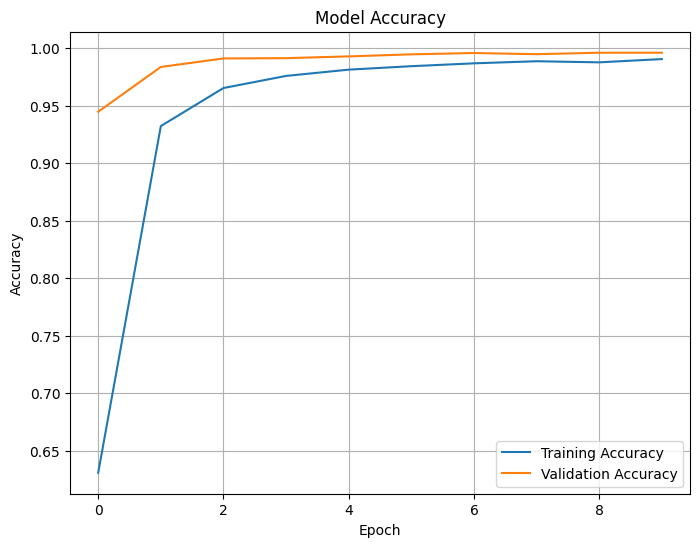

In [27]:
# Your answers here!

# plot the graph for accuracy

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()









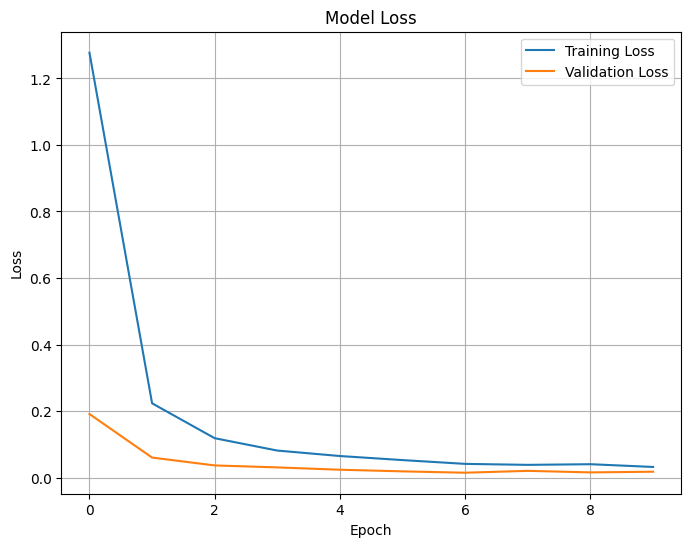

In [29]:
# Your answers here!

# plot the graph for loss

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()







## **These are my initial graphs from the first run and they tell me that my model was basically learning nothing.  After retaining my model I am seeing a HUGE improvement in both Accuracy and Loss (graphs right above)**

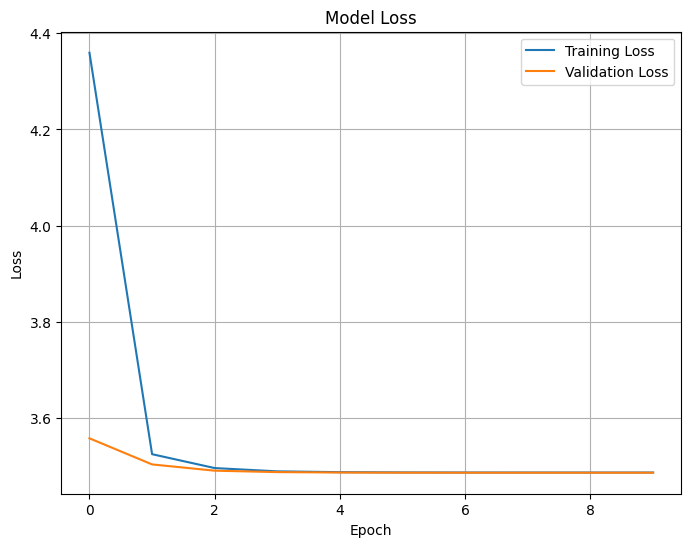

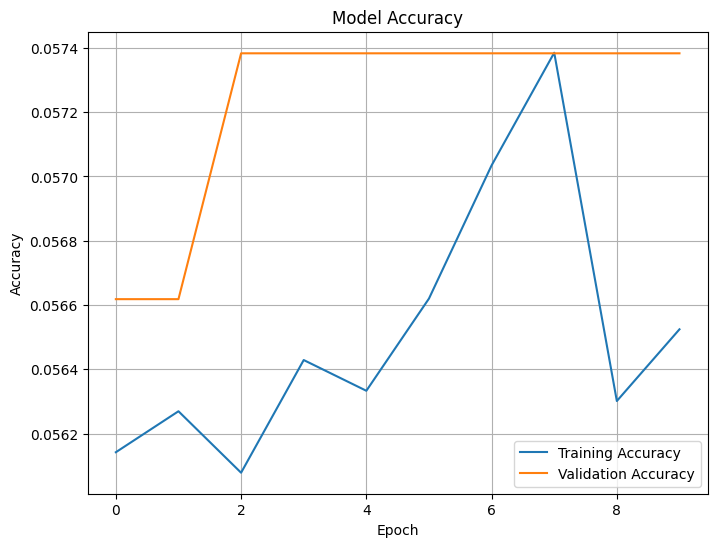

## Evaluate using Test Dataset
Just now, we evaluated the model using the data from the training dataset. <br>
Now, we will evaluate using Test.csv, which is the data that the model has never seen before.

In [30]:
# test accuracy on test dataset
from sklearn.metrics import accuracy_score
import pandas as pd

# Load test CSV file
y_test = pd.read_csv('/content/train/Test.csv')

# Extract labels and image paths
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

# Initialize list to hold image data
data = []


In [31]:
# Preview first 5 image paths
for i, path in enumerate(imgs[:5]):
    print(f"Original path {i}: {path}")

if imgs[0].startswith('/content/train/'):
    print("Paths already have full prefix. Using as is.")
else:
    print("Paths are relative. Prepending '/content/train/'")
    imgs = ['/content/train/' + path for path in imgs]



Original path 0: Test/00000.png
Original path 1: Test/00001.png
Original path 2: Test/00002.png
Original path 3: Test/00003.png
Original path 4: Test/00004.png
Paths are relative. Prepending '/content/train/'


In [32]:
y_test = pd.read_csv('/content/train/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values


In [33]:
imgs = ['/content/train/test/' + path for path in imgs]

In [34]:
# Fix broken paths and load test images
from PIL import Image
import numpy as np
import pandas as pd

# Reload CSV to get fresh labels and image paths
y_test = pd.read_csv('/content/train/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

# Prepend the full folder path once to each image path
imgs = ['/content/train/' + path for path in imgs]

# Load, resize, and convert images to numpy arrays
data = []
for img_path in imgs:
    try:
        image = Image.open(img_path)
        image = image.resize((30, 30))  # Resize to match model input size
        data.append(np.array(image))
    except Exception as e:
        print(f"Error loading {img_path}: {e}")

# Convert list of images to numpy array for model input
X_test = np.array(data)
print(f"Loaded {len(X_test)} images.")



Loaded 12630 images.


## Check accuracy
Use accuracy_score from sklearn.metrics to compare the score between the actual labels and predictions.

In [35]:
# Your answers here!

# Get predicted probabilities for each class
y_pred_probs = model.predict(X_test)

# Convert probabilities to predicted class labels
pred = y_pred_probs.argmax(axis=1)

# Now calculate accuracy
accuracy = accuracy_score(labels, pred)
print(f"Accuracy: {accuracy:.4f}")
# Accuracy with the test data
from sklearn.metrics import accuracy_score

# Assuming 'labels' are the true labels and 'pred' are your model predictions
accuracy = accuracy_score(labels, pred)
print(f"Accuracy: {accuracy:.4f}")




395/395 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step
Accuracy: 0.9314
Accuracy: 0.9314


# What is your best model?
In order to get the best model, you will need to modify the parameters. <br>
Look back at the models in section 4, can you fine-tune them better? <br><br>
What is your best model? How does it fare?

My model initially had an accuracy of 5.94% which is terrible.  I started with 10 epoch and a batch size of 32.  I then went back and tweaked it to 20 epochs with a batch size of 64.


I went back to step 3 data exploration.  In the cell where we were suppose to Retrieve the images and their labels, I changed some things around.  I first had to fix the path to where the class folders actually were.  I also converte all images to RGB for consistency.  I did this to make sure all images were loaded properly and consistantly to try and improve accuracy.

# Section 6: Deployment
What makes a good deployment? <br>
It has to be useful and easy to use. <br>
It needs to be updated frequently and easily.<br>
Deployment can be on-premise or online.<br>

In the cell below, write down your suggestions on how you can deploy this AI model.

In [26]:
# Your answers here!

# Since this is used on autonomous vehicle, it will be used in the embedded system of the car.
# The camera feeds from the camera will be captured and analyzed by the model directly.

# Other Reading Materials
You can get more info through these materials: <br>
